In [40]:
import pandas as pd
from datetime import datetime,timedelta
import time
import numpy as np

In [3]:
inclusion_exclusion = pd.read_excel("Inclusion_exclusion.xlsx",)

In [8]:
n100_2015 = pd.read_excel('N100_2015.xlsx')
n100_current = pd.read_csv('ind_nifty100list.csv')

In [7]:
symbols =  pd.concat([n100_cur.Symbol, inclusion_exclusion.NSE_symbol]).unique()
symbols

array(['ABB', 'ADANIENSOL', 'ADANIENT', 'ADANIGREEN', 'ADANIPORTS',
       'ADANIPOWER', 'ATGL', 'AMBUJACEM', 'APOLLOHOSP', 'ASIANPAINT',
       'DMART', 'AXISBANK', 'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV',
       'BAJAJHLDNG', 'BANKBARODA', 'BERGEPAINT', 'BEL', 'BPCL',
       'BHARTIARTL', 'BOSCHLTD', 'BRITANNIA', 'CANBK', 'CHOLAFIN',
       'CIPLA', 'COALINDIA', 'COLPAL', 'DLF', 'DABUR', 'DIVISLAB',
       'DRREDDY', 'EICHERMOT', 'GAIL', 'GODREJCP', 'GRASIM', 'HCLTECH',
       'HDFCBANK', 'HDFCLIFE', 'HAVELLS', 'HEROMOTOCO', 'HINDALCO', 'HAL',
       'HINDUNILVR', 'ICICIBANK', 'ICICIGI', 'ICICIPRULI', 'ITC', 'IOC',
       'IRCTC', 'IRFC', 'INDUSINDBK', 'NAUKRI', 'INFY', 'INDIGO',
       'JSWSTEEL', 'JINDALSTEL', 'JIOFIN', 'KOTAKBANK', 'LTIM', 'LT',
       'LICI', 'M&M', 'MARICO', 'MARUTI', 'NTPC', 'NESTLEIND', 'ONGC',
       'PIDILITIND', 'PFC', 'POWERGRID', 'PNB', 'RECLTD', 'RELIANCE',
       'SBICARD', 'SBILIFE', 'SRF', 'MOTHERSON', 'SHREECEM', 'SHRIRAMFIN',
       'SIEMENS', 'SBI

In [17]:
# n100_2015.Symbol.
unique_symbols = n100_2015[~n100_2015['Symbol'].isin(symbols)]
unique_symbols.Symbol

40           ACC
44    AUROPHARMA
55        CONCOR
56    CROMPGREAV
62          HDFC
66     HINDPETRO
70      INFRATEL
76         LUPIN
79    MOTHERSUMI
80          NMDC
82          OFSS
88    SRTRANSFIN
89          SSLT
97           UPL
99          ZEEL
Name: Symbol, dtype: object

## Connect to broker

In [ ]:
import Z_KiteConnect as kite
# y = kite.KiteConnect("USER ID","PASS")

In [20]:
instrumentList = pd.read_csv("https://api.kite.trade/instruments")
def get_insToken(tradesymbol,exchange="NFO"):
    if(exchange=="NSE"):
        if(tradesymbol=="NIFTY"):tradesymbol="NIFTY 50"
        if(tradesymbol=="BANKNIFTY"):tradesymbol="NIFTY BANK"
        if(tradesymbol=="FINNIFTY"):tradesymbol="NIFTY FIN SERVICE"
    dataToken = instrumentList[(instrumentList['tradingsymbol'] == tradesymbol)&(instrumentList['exchange']==exchange)]
    return dataToken.instrument_token.iloc[0]

In [21]:
def get_historical_data_for_symbols(y, symbols, start_date, end_date):
    def fetch_data(symbol, start, end):
        # Fetch historical data for the given symbol and date range
        data = y.historical_data(get_insToken(symbol, "NSE"), start, end, 'day')
        # Convert the data to a DataFrame
        df = pd.DataFrame(data)
        # Add the symbol as the first column
        df.insert(0, 'Symbol', symbol)
        return df
    
    def date_chunks(start_date, end_date, chunk_size=365*5):
        start = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
        end = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')
        while start < end:
            chunk_end = start + timedelta(days=chunk_size)
            if chunk_end > end:
                chunk_end = end
            yield start.strftime('%Y-%m-%d %H:%M:%S'), chunk_end.strftime('%Y-%m-%d %H:%M:%S')
            start = chunk_end + timedelta(seconds=1)  # To avoid overlapping
        
    all_data = []
    
    for symbol in symbols:
        for chunk_start, chunk_end in date_chunks(start_date, end_date):
            try:
                df = fetch_data(symbol, chunk_start, chunk_end)
                all_data.append(df)
            except Exception as e:
                print(f"Error fetching data for {symbol} from {chunk_start} to {chunk_end}: {e}")
#         time.sleep(10)
    # Concatenate all DataFrames in the list into a single DataFrame
    combined_df = pd.concat(all_data, ignore_index=True)
    
    return combined_df

# Usage example
# symbols is a list of symbol strings
start_date = '2015-01-01 09:15:00'
end_date = '2024-05-29 15:29:00'
combined_df = get_historical_data_for_symbols(y, unique_symbols.Symbol[:], start_date, end_date)

# Display the combined DataFrame
print(combined_df)

Redirect url :  https://kite.zerodha.com/oms/instruments/historical/5633/day
Redirect url :  https://kite.zerodha.com/oms/instruments/historical/5633/day
Redirect url :  https://kite.zerodha.com/oms/instruments/historical/70401/day
Redirect url :  https://kite.zerodha.com/oms/instruments/historical/70401/day
Redirect url :  https://kite.zerodha.com/oms/instruments/historical/1215745/day
Redirect url :  https://kite.zerodha.com/oms/instruments/historical/1215745/day
Error fetching data for CROMPGREAV from 2015-01-01 09:15:00 to 2019-12-31 09:15:00: single positional indexer is out-of-bounds
Error fetching data for CROMPGREAV from 2019-12-31 09:15:01 to 2024-05-29 15:29:00: single positional indexer is out-of-bounds
Error fetching data for HDFC from 2015-01-01 09:15:00 to 2019-12-31 09:15:00: single positional indexer is out-of-bounds
Error fetching data for HDFC from 2019-12-31 09:15:01 to 2024-05-29 15:29:00: single positional indexer is out-of-bounds
Redirect url :  https://kite.zerod

In [22]:
combined_df.to_pickle("scrips_10.pkl")  

In [150]:
df = pd.read_pickle('combined_scrips.pkl')
# rows_for_date = df.loc[datetime(2016,12,31)]
# rows_for_date
# Specific date to view
df.index

DatetimeIndex(['2015-01-02 00:00:00+05:30', '2015-01-05 00:00:00+05:30',
               '2015-01-06 00:00:00+05:30', '2015-01-07 00:00:00+05:30',
               '2015-01-08 00:00:00+05:30', '2015-01-09 00:00:00+05:30',
               '2015-01-12 00:00:00+05:30', '2015-01-13 00:00:00+05:30',
               '2015-01-14 00:00:00+05:30', '2015-01-15 00:00:00+05:30',
               ...
               '2024-05-16 00:00:00+05:30', '2024-05-17 00:00:00+05:30',
               '2024-05-18 00:00:00+05:30', '2024-05-21 00:00:00+05:30',
               '2024-05-22 00:00:00+05:30', '2024-05-23 00:00:00+05:30',
               '2024-05-24 00:00:00+05:30', '2024-05-27 00:00:00+05:30',
               '2024-05-28 00:00:00+05:30', '2024-05-29 00:00:00+05:30'],
              dtype='datetime64[ns, tzoffset(None, 19800)]', name='date', length=335500, freq=None)

In [151]:
date_to_view = '2015-12-31'

# Convert date_to_view to the same timezone as the DataFrame index
date_to_view = pd.to_datetime(date_to_view).tz_localize('Asia/Kolkata')

# View rows with the specific date
rows_with_date = df.loc[df.index.date == date_to_view.date()]
rows_with_date

,name,open,close
date,,,
2015-12-31 00:00:00+05:30,ABB,872.80,871.45
2015-12-31 09:15:00+05:30,ABB,872.80,871.45
2015-12-31 00:00:00+05:30,ADANIENSOL,36.54,36.90
2015-12-31 09:15:00+05:30,ADANIENSOL,36.55,36.90
2015-12-31 00:00:00+05:30,ADANIENT,83.60,83.40
...,...,...,...
2015-12-31 09:15:00+05:30,OFSS,3510.00,3492.60
2015-12-31 00:00:00+05:30,UPL,290.00,292.05
2015-12-31 09:15:00+05:30,UPL,290.00,292.05


In [154]:
cleaned_df = df.groupby(['name', df.index.date]).first().reset_index()

# Remove the temporary 'date_only' column
cleaned_df.rename(columns={'level_1': 'date'}, inplace=True)

cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
# cleaned_df
cleaned_df.set_index('date',inplace=True)
cleaned_df

,name,open,close
date,,,
2015-01-02,ABB,1027.20,1007.10
2015-01-05,ABB,1014.90,1007.30
2015-01-06,ABB,1005.90,998.15
2015-01-07,ABB,1007.00,983.80
2015-01-08,ABB,988.30,1007.10
...,...,...,...
2024-05-23,ZYDUSLIFE,1090.00,1086.05
2024-05-24,ZYDUSLIFE,1088.95,1076.00
2024-05-27,ZYDUSLIFE,1083.85,1058.50


In [155]:
date_to_view = '2015-12-31'

# Convert date_to_view to the same timezone as the DataFrame index
date_to_view = pd.to_datetime(date_to_view).tz_localize('Asia/Kolkata')

# View rows with the specific date
rows_with_date = cleaned_df.loc[cleaned_df.index.date == date_to_view.date()]
rows_with_date

,name,open,close
date,,,
2015-12-31,ABB,872.80,871.45
2015-12-31,ABBOTINDIA,5850.00,6010.75
2015-12-31,ACC,1345.00,1360.65
2015-12-31,ADANIENSOL,36.54,36.90
2015-12-31,ADANIENT,83.60,83.40
...,...,...,...
2015-12-31,VEDL,70.25,68.40
2015-12-31,WIPRO,209.77,210.49
2015-12-31,YESBANK,146.82,145.16


In [156]:
# Reset the index to handle duplicate dates
df_reset = cleaned_df.reset_index()

# Calculate daily returns
df_reset['daily_return'] = df_reset.groupby('name')['close'].pct_change()

# Annual risk-free rate
annual_risk_free_rate = 0.07

# Convert annual risk-free rate to daily rate
daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1 / 252) - 1

# Function to calculate rolling Sharpe ratio adjusted returns
def calculate_sharpe_adjusted_returns(df, window=126, risk_free_rate=daily_risk_free_rate):
    def calculate_group_sharpe(group):
        rolling_mean = group['daily_return'].rolling(window=window).mean()
        rolling_std = group['daily_return'].rolling(window=window).std()
        sharpe_ratio = (rolling_mean - risk_free_rate) / rolling_std
        # Annualize the Sharpe ratio
        sharpe_ratio_annualized = sharpe_ratio * np.sqrt(252)
        group['sharpe_adjusted_return'] = group['daily_return'] * sharpe_ratio_annualized
        return group
    
    # Group by the 'name' column and apply the sharpe calculation
    df = df.groupby('name').apply(calculate_group_sharpe)
    
    return df

# Apply the function
df_with_sharpe_adjusted_returns = calculate_sharpe_adjusted_returns(df_reset)

# Set the index back to the original format
df_with_sharpe_adjusted_returns.set_index('date', inplace=True)

# Display the resulting DataFrame
print(df_with_sharpe_adjusted_returns)

                 name     open    close  daily_return  sharpe_adjusted_return
date                                                                         
2015-01-02        ABB  1027.20  1007.10           NaN                     NaN
2015-01-05        ABB  1014.90  1007.30      0.000199                     NaN
2015-01-06        ABB  1005.90   998.15     -0.009084                     NaN
2015-01-07        ABB  1007.00   983.80     -0.014377                     NaN
2015-01-08        ABB   988.30  1007.10      0.023684                     NaN
...               ...      ...      ...           ...                     ...
2024-05-23  ZYDUSLIFE  1090.00  1086.05      0.004997                0.018046
2024-05-24  ZYDUSLIFE  1088.95  1076.00     -0.009254               -0.032819
2024-05-27  ZYDUSLIFE  1083.85  1058.50     -0.016264               -0.055039
2024-05-28  ZYDUSLIFE  1060.05  1052.95     -0.005243               -0.017368
2024-05-29  ZYDUSLIFE  1044.15  1044.75     -0.007788           

In [43]:
df_with_sharpe_adjusted_returns.to_pickle('scrip_with_sharpeoc.pkl')

In [157]:
stock_dfs = {name: data.drop(columns=['name']) for name, data in df_with_sharpe_adjusted_returns.groupby('name')}

In [158]:
# Reindex data frames to the full date range, filling missing values with NaN
aligned_data = {}
reference_index = stock_dfs['ABB'].index  # Use the index of the first stock as reference

for name, df in stock_dfs.items():
    df = df[~df.index.duplicated(keep='first')]  # Remove duplicate indices
    aligned_data[name] = df.reindex(reference_index)

## Backtesting

In [45]:
import backtrader as bt
import backtrader.analyzers as btanalyzers


In [56]:
class PandasDataOptix(bt.feeds.PandasData):
    lines = ('sharpe_adjusted_return','daily_return'  ,)
    params = (
        ('sharpe_adjusted_return', -1),('daily_return', -1),
    )

## Long Short

In [ ]:
class MyStrategy(bt.Strategy):
    params = (
        ('rebalance_monthday', 1),
        ('max_weight', 0.05),
        ('top_n', 20),
        )
    
    def __init__(self):
        
        
        self.data_close = {data._name: data.close for data in self.datas}
        self.data_sharpe = {data._name: data.sharpe_adjusted_return for data in self.datas}
        self.last_month = None
        self.log = []
        self.daily_values = []
        self.portfolio_compositions = []

            
        self.add_timer(
            bt.timer.SESSION_START,  # when it will be called
            monthdays=[1],  # called on the 1st day of the month
            monthcarry=True,  # called on the 2nd day if the 1st is holiday
            tzdata=self.datas[0], #Incase of craziness
        )
    def log_data(self, txt):
        """Logging function."""
#         print(txt)
        self.log.append(txt)
        
    def notify_order(self, order):
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log_data(f"BUY EXECUTED, {order.data._name}: Price: {order.executed.price:.2f}, Size: {order.executed.size:.2f}")
            elif order.issell():
                self.log_data(f"SELL EXECUTED, {order.data._name}: Price: {order.executed.price:.2f}, Size: {order.executed.size:.2f}")
        elif order.status == order.Canceled:
            self.log_data(f"Order Canceled for {order.data._name}")
        elif order.status == order.Margin:
            self.log_data(f"Order Margin for {order.data._name}")
        elif order.status == order.Rejected:
            self.log_data(f"Order Rejected for {order.data._name}")
            
            
    def next(self):

        dt = self.datas[0].datetime.date(0)
        
        portfolio_value = self.broker.getvalue()
        long_value = sum(pos.size * pos.price for d, pos in self.broker.positions.items() if pos.size > 0)
        short_value = sum(pos.size * pos.price for d, pos in self.broker.positions.items() if pos.size < 0)
        self.daily_values.append({
            'date': dt,
            'portfolio_value': portfolio_value,
            'long_value': long_value,
            'short_value': short_value
        })
        
        self.log_data(f"{dt} - Portfolio Value: {self.broker.getvalue():.2f}")
        if dt.month != self.last_month:
            self.last_month = dt.month
#             if dt.day == self.p.rebalance_monthday:
            self.rebalance_portfolio()
    
    def rebalance_portfolio(self):
        sharpe_ratios = {name: self.data_sharpe[name][0] for name in self.data_sharpe}
#         sorted_sharpe = sorted(sharpe_ratios.items(), key=lambda x: x[1], reverse=True)
        
        sorted_sharpe = sorted([(k, v) for k, v in sharpe_ratios.items() if pd.notna(v)], key=lambda x: x[1], reverse=True)
        
        if len(sorted_sharpe) < self.p.top_n:
            self.log_data(f"Not enough valid Sharpe ratios for rebalancing on {self.datas[0].datetime.date(0)}")
            return
        
        top_n = sorted_sharpe[:self.p.top_n]
        bottom_n = sorted_sharpe[-self.p.top_n:]
        
        top_n_stocks = {stock for stock, _ in top_n}
        bottom_n_stocks = {stock for stock, _ in bottom_n}
        
        self.log_data(f"Rebalancing on {self.datas[0].datetime.date(0)}")
#         self.log_data("Sorted Sharpe Ratios:")

#         for stock, sharpe in sorted_sharpe:
#             self.log_data(f"{stock}: {sharpe:.4f}")
        
        # Adjust positions
        current_positions = self.getpositions()
        self.log_data(f'Current Positions ->>  {self.getpositions()}')
        
        for stock,_ in current_positions.items():
            if stock not in top_n_stocks and stock not in bottom_n_stocks:
                self.order_target_percent(data=self.getdatabyname(stock), target=0)
                self.log_data(f"Exiting {stock} at {self.data_close[stock][0]}")
        # Equally weight top and bottom stocks
        weight = self.p.max_weight
        for stock, _ in top_n:
            self.order_target_percent(data=self.getdatabyname(stock), target=weight)
            self.log_data(f"Buying {stock} at {self.data_close[stock][0]}")
        for stock, _ in bottom_n:
            self.order_target_percent(data=self.getdatabyname(stock), target=-weight)
            self.log_data(f"Selling {stock} at {self.data_close[stock][0]}")
        
        # Save portfolio composition
        self.portfolio_compositions.append({
            'date': self.datas[0].datetime.date(0),
            'positions': current_positions
        })
        
        
    def getpositions(self):
        return {d._name: pos.size for d, pos in self.broker.positions.items() if pos.size != 0}
    
cerebro = bt.Cerebro()

for name, data in aligned_data.items():
    data_feed = PandasDataOptix(dataname=data)
    cerebro.adddata(data_feed, name=name)

cerebro.addstrategy(MyStrategy)
cerebro.broker.set_cash(1000000.0)
cerebro.broker.setcommission(commission=0.001)

# Add analyzers
cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annual_return')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio', riskfreerate=0.07, timeframe=bt.TimeFrame.Years)
cerebro.addanalyzer(bt.analyzers.TimeDrawDown,_name='timedd')

cerebro.addanalyzer(bt.analyzers.LogReturnsRolling,_name='rolling')
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer,_name='trades')

# cerebro(cheat_on_close=True)
results = cerebro.run()


# Extract and print analyzers
strategy = results[0]

annual_return = strategy.analyzers.annual_return.get_analysis()
drawdown = strategy.analyzers.drawdown.get_analysis()
sharpe_ratio = strategy.analyzers.sharpe_ratio.get_analysis()
log_returns =  strategy.analyzers.rolling.get_analysis()
trades = strategy.analyzers.trades.get_analysis()

print("Annual Returns:")
for year, ret in annual_return.items():
    print(f"{year}: {ret:.2%}")

print(f"\nMax Drawdown: {drawdown.max.drawdown:.2f}%")


print(f"\nTime in Drawdown: {drawdown.max.len:.2f}")
print(f"\nSharpe Ratio: {sharpe_ratio['sharperatio']:.2f}")

# Save log to a file
with open("strategy_log.txt", "w") as f:
    for entry in cerebro.runstrats[0][0].log:
        f.write(f"{entry}\n")
        
# Save daily portfolio values to a DataFrame
daily_values_df = pd.DataFrame(strategy.daily_values)
daily_values_df.set_index('date', inplace=True)
daily_values_df.to_csv('daily_portfolio_values.csv')

# Save portfolio composition at each rebalance to a DataFrame
portfolio_compositions_df = pd.DataFrame(strategy.portfolio_compositions)
portfolio_compositions_df.to_csv('portfolio_compositions.csv')

## Long Only Strategy

In [206]:
class MyStrategy(bt.Strategy):
    params = (
        ('rebalance_monthday', 1),
        ('max_weight', 0.05),
        ('top_n', 20),
        )
    
    def __init__(self):
        
        
        self.data_close = {data._name: data.close for data in self.datas}
        self.data_sharpe = {data._name: data.sharpe_adjusted_return for data in self.datas}
        self.last_month = None
        self.log = []
        self.daily_values = []
        self.portfolio_compositions = []

            
        self.add_timer(
            bt.timer.SESSION_START,  # when it will be called
            monthdays=[1],  # called on the 1st day of the month
            monthcarry=True,  # called on the 2nd day if the 1st is holiday
            tzdata=self.datas[0], #Incase of craziness
        )
    def log_data(self, txt):
        """Logging function."""
#         print(txt)
        self.log.append(txt)
        
    def notify_order(self, order):
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log_data(f"BUY EXECUTED, {order.data._name}: Price: {order.executed.price:.2f}, Size: {order.executed.size:.2f}")
            elif order.issell():
                self.log_data(f"SELL EXECUTED, {order.data._name}: Price: {order.executed.price:.2f}, Size: {order.executed.size:.2f}")
        elif order.status == order.Canceled:
            self.log_data(f"Order Canceled for {order.data._name}")
        elif order.status == order.Margin:
            self.log_data(f"Order Margin for {order.data._name}")
        elif order.status == order.Rejected:
            self.log_data(f"Order Rejected for {order.data._name}")
            
            
    def next(self):

        dt = self.datas[0].datetime.date(0)
        
        portfolio_value = self.broker.getvalue()
        long_value = sum(pos.size * pos.price for d, pos in self.broker.positions.items() if pos.size > 0)
        short_value = sum(pos.size * pos.price for d, pos in self.broker.positions.items() if pos.size < 0)
        self.daily_values.append({
            'date': dt,
            'portfolio_value': portfolio_value,
            'long_value': long_value,
            'short_value': short_value
        })
        
        self.log_data(f"{dt} - Portfolio Value: {self.broker.getvalue():.2f}")
        if dt.month != self.last_month:
            self.last_month = dt.month
#             if dt.day == self.p.rebalance_monthday:
            self.rebalance_portfolio()
    
    def rebalance_portfolio(self):
        sharpe_ratios = {name: self.data_sharpe[name][0] for name in self.data_sharpe}
#         sorted_sharpe = sorted(sharpe_ratios.items(), key=lambda x: x[1], reverse=True)
        
        sorted_sharpe = sorted([(k, v) for k, v in sharpe_ratios.items() if pd.notna(v)], key=lambda x: x[1], reverse=True)
        
        if len(sorted_sharpe) < self.p.top_n:
            self.log_data(f"Not enough valid Sharpe ratios for rebalancing on {self.datas[0].datetime.date(0)}")
            return
        
        top_n = sorted_sharpe[:self.p.top_n]
        top_n_stocks = {stock for stock, _ in top_n}

        self.log_data(f"Rebalancing on {self.datas[0].datetime.date(0)}")
#         self.log_data("Sorted Sharpe Ratios:")

#         for stock, sharpe in sorted_sharpe:
#             self.log_data(f"{stock}: {sharpe:.4f}")
        
        # Adjust positions
        current_positions = self.getpositions()
        self.log_data(f'Current Positions ->>  {self.getpositions()}')
        
        for stock, position in self.getpositions().items():
            if stock not in top_n_stocks:
                self.close(data=self.getdatabyname(stock))
                self.log_data(f"Exiting {stock} at {self.data_close[stock][0]}")
        
    
        # Equally weight top and bottom stocks
        weight = self.p.max_weight
        for stock, _ in top_n:
            self.order_target_percent(data=self.getdatabyname(stock), target=weight)
            self.log_data(f"Buying {stock} at {self.data_close[stock][0]}")

        # Save portfolio composition
        self.portfolio_compositions.append({
            'date': self.datas[0].datetime.date(0),
            'positions': current_positions
        })
        
        
    def getpositions(self):
        return {d._name: pos.size for d, pos in self.broker.positions.items() if pos.size != 0}
    
cerebro = bt.Cerebro()

for name, data in aligned_data.items():
    data_feed = PandasDataOptix(dataname=data)
    cerebro.adddata(data_feed, name=name)

cerebro.addstrategy(MyStrategy)
cerebro.broker.set_cash(1000000.0)
cerebro.broker.setcommission(commission=0.001)

# Add analyzers
cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annual_return')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio', riskfreerate=0.07, timeframe=bt.TimeFrame.Years)
cerebro.addanalyzer(bt.analyzers.TimeDrawDown,_name='timedd')

cerebro.addanalyzer(bt.analyzers.LogReturnsRolling,_name='rolling')
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer,_name='trades')

# cerebro(cheat_on_close=True)
results = cerebro.run()


# Extract and print analyzers
strategy = results[0]

annual_return = strategy.analyzers.annual_return.get_analysis()
drawdown = strategy.analyzers.drawdown.get_analysis()
sharpe_ratio = strategy.analyzers.sharpe_ratio.get_analysis()
log_returns =  strategy.analyzers.rolling.get_analysis()
trades = strategy.analyzers.trades.get_analysis()

print("Annual Returns:")
for year, ret in annual_return.items():
    print(f"{year}: {ret:.2%}")

print(f"\nMax Drawdown: {drawdown.max.drawdown:.2f}%")


print(f"\nTime in Drawdown: {drawdown.max.len:.2f}")
print(f"\nSharpe Ratio: {sharpe_ratio['sharperatio']:.2f}")

# Save log to a file
with open("strategy_log.txt", "w") as f:
    for entry in cerebro.runstrats[0][0].log:
        f.write(f"{entry}\n")
        
# Save daily portfolio values to a DataFrame
daily_values_df = pd.DataFrame(strategy.daily_values)
daily_values_df.set_index('date', inplace=True)
daily_values_df.to_csv('daily_portfolio_values.csv')

# Save portfolio composition at each rebalance to a DataFrame
portfolio_compositions_df = pd.DataFrame(strategy.portfolio_compositions)
portfolio_compositions_df.to_csv('portfolio_compositions.csv')

Annual Returns:
2015: 1.06%
2016: 18.19%
2017: 25.84%
2018: 4.70%
2019: -6.93%
2020: 18.76%
2021: 53.24%
2022: 23.80%
2023: 30.53%
2024: 26.57%

Max Drawdown: 45.09%

Time in Drawdown: 574.00

Sharpe Ratio: 0.78


## Trade Analysis

In [207]:
def pretty_print_trades_analysis(trades):
    print("Trades Analysis:\n")
    
    # Total Open/Closed Trades
    total = trades['total']
    print("Total Open/Closed Trades:")
    print(f"  Total: {total['total']}")
    print(f"  Open: {total['open']}")
    print(f"  Closed: {total['closed']}\n")
    
    # Streak Won/Lost Current/Longest
    streak = trades['streak']
    print("Streak Won/Lost Current/Longest:")
    print(f"  Won Current: {streak['won']['current']}")
    print(f"  Won Longest: {streak['won']['longest']}")
    print(f"  Lost Current: {streak['lost']['current']}")
    print(f"  Lost Longest: {streak['lost']['longest']}\n")
    
    # ProfitAndLoss Total/Average
    pnl = trades['pnl']
    print("Profit And Loss Total/Average:")
    print(f"  Gross Total: {pnl['gross']['total']}")
    print(f"  Gross Average: {pnl['gross']['average']}")
    print(f"  Net Total: {pnl['net']['total']}")
    print(f"  Net Average: {pnl['net']['average']}\n")
    
    # Won/Lost Count/ Total PNL/ Average PNL / Max PNL
    print("Won/Lost Count/ Total PNL/ Average PNL / Max PNL:")
    won = trades['won']
    lost = trades['lost']
    print(f"  Won Count: {won['total']}")
    print(f"  Won Total PNL: {won['pnl']['total']}")
    print(f"  Won Average PNL: {won['pnl']['average']}")
    print(f"  Won Max PNL: {won['pnl']['max']}")
    print(f"  Lost Count: {lost['total']}")
    print(f"  Lost Total PNL: {lost['pnl']['total']}")
    print(f"  Lost Average PNL: {lost['pnl']['average']}")
    print(f"  Lost Max PNL: {lost['pnl']['max']}\n")
    
    # Long/Short Count/ Total PNL / Average PNL / Max PNL
    long = trades['long']
    short = trades['short']
    print("Long/Short Count/ Total PNL / Average PNL / Max PNL:")
    print(f"  Long Count: {long['total']}")
    print(f"  Long Total PNL: {long['pnl']['total']}")
    print(f"  Long Average PNL: {long['pnl']['average']}")
    print(f"  Long Max PNL: {long['pnl']['won']['max']}")
    print(f"  Short Count: {short['total']}")
    print(f"  Short Total PNL: {short['pnl']['total']}")
    print(f"  Short Average PNL: {short['pnl']['average']}")
    print(f"  Short Max PNL: {short['pnl']['won']['max']}\n")
    
    # Won/Lost Count/ Total PNL/ Average PNL / Max PNL for Long and Short
    print("Long/Short Won/Lost Count/ Total PNL/ Average PNL / Max PNL:")
    print(f"  Long Won Count: {long['won']}")
    print(f"  Long Won Total PNL: {long['pnl']['won']['total']}")
    print(f"  Long Won Average PNL: {long['pnl']['won']['average']}")
    print(f"  Long Won Max PNL: {long['pnl']['won']['max']}")
    print(f"  Long Lost Count: {long['lost']}")
    print(f"  Long Lost Total PNL: {long['pnl']['lost']['total']}")
    print(f"  Long Lost Average PNL: {long['pnl']['lost']['average']}")
    print(f"  Long Lost Max PNL: {long['pnl']['lost']['max']}")
    print(f"  Short Won Count: {short['won']}")
    print(f"  Short Won Total PNL: {short['pnl']['won']['total']}")
    print(f"  Short Won Average PNL: {short['pnl']['won']['average']}")
    print(f"  Short Won Max PNL: {short['pnl']['won']['max']}")
    print(f"  Short Lost Count: {short['lost']}")
    print(f"  Short Lost Total PNL: {short['pnl']['lost']['total']}")
    print(f"  Short Lost Average PNL: {short['pnl']['lost']['average']}")
    print(f"  Short Lost Max PNL: {short['pnl']['lost']['max']}\n")
    
    # Length (bars in the market)
    length = trades['len']
    print("Length (bars in the market):")
    print(f"  Total: {length['total']}")
    print(f"  Average: {length['average']}")
    print(f"  Max: {length['max']}")
    print(f"  Min: {length['min']}\n")
    
    # Won/Lost Total/Average/Max/Min
    length_won = length['won']
    length_lost = length['lost']
    print("Won/Lost Length (bars in the market):")
    print(f"  Won Total: {length_won['total']}")
    print(f"  Won Average: {length_won['average']}")
    print(f"  Won Max: {length_won['max']}")
    print(f"  Won Min: {length_won['min']}")
    print(f"  Lost Total: {length_lost['total']}")
    print(f"  Lost Average: {length_lost['average']}")
    print(f"  Lost Max: {length_lost['max']}")
    print(f"  Lost Min: {length_lost['min']}\n")
    
    # Long/Short Total/Average/Max/Min
    length_long = length['long']
    length_short = length['short']
    print("Long/Short Length (bars in the market):")
    print(f"  Long Total: {length_long['total']}")
    print(f"  Long Average: {length_long['average']}")
    print(f"  Long Max: {length_long['max']}")
    print(f"  Long Min: {length_long['min']}")
    print(f"  Short Total: {length_short['total']}")
    print(f"  Short Average: {length_short['average']}")
    print(f"  Short Max: {length_short['max']}")
    print(f"  Short Min: {length_short['min']}\n")
    
    # Long/Short Won/Lost Total/Average/Max/Min
    length_long_won = length_long['won']
    length_long_lost = length_long['lost']
    length_short_won = length_short['won']
    length_short_lost = length_short['lost']
    print("Long/Short Won/Lost Length (bars in the market):")
    print(f"  Long Won Total: {length_long_won['total']}")
    print(f"  Long Won Average: {length_long_won['average']}")
    print(f"  Long Won Max: {length_long_won['max']}")
    print(f"  Long Won Min: {length_long_won['min']}")
    print(f"  Long Lost Total: {length_long_lost['total']}")
    print(f"  Long Lost Average: {length_long_lost['average']}")
    print(f"  Long Lost Max: {length_long_lost['max']}")
    print(f"  Long Lost Min: {length_long_lost['min']}")
    print(f"  Short Won Total: {length_short_won['total']}")
    print(f"  Short Won Average: {length_short_won['average']}")
    print(f"  Short Won Max: {length_short_won['max']}")
    print(f"  Short Won Min: {length_short_won['min']}")
    print(f"  Short Lost Total: {length_short_lost['total']}")
    print(f"  Short Lost Average: {length_short_lost['average']}")
    print(f"  Short Lost Max: {length_short_lost['max']}")
    print(f"  Short Lost Min: {length_short_lost['min']}")



pretty_print_trades_analysis(trades)

Trades Analysis:

Total Open/Closed Trades:
  Total: 1638
  Open: 20
  Closed: 1618

Streak Won/Lost Current/Longest:
  Won Current: 3
  Won Longest: 21
  Lost Current: 0
  Lost Longest: 24

Profit And Loss Total/Average:
  Gross Total: 4510050.810000002
  Gross Average: 2787.423244746602
  Net Total: 4186977.4540900034
  Net Average: 2587.7487355315225

Won/Lost Count/ Total PNL/ Average PNL / Max PNL:
  Won Count: 869
  Won Total PNL: 9644685.671089996
  Won Average PNL: 11098.602613452238
  Won Max PNL: 178643.02590000004
  Lost Count: 749
  Lost Total PNL: -5457708.216999997
  Lost Average PNL: -7286.659835781038
  Lost Max PNL: -81845.81539999998

Long/Short Count/ Total PNL / Average PNL / Max PNL:
  Long Count: 1618
  Long Total PNL: 4186977.4540900034
  Long Average PNL: 2587.7487355315225
  Long Max PNL: 178643.02590000004
  Short Count: 0
  Short Total PNL: 0.0
  Short Average PNL: 0.0
  Short Max PNL: 0.0

Long/Short Won/Lost Count/ Total PNL/ Average PNL / Max PNL:
  Long W

In [209]:
trades_df = pd.DataFrame(list(log_returns.items()), columns=['Metric', 'Rolling_returns'])
trades_df


,Metric,Rolling_returns
0,2015-01-02,0.000000
1,2015-01-05,0.000000
2,2015-01-06,0.000000
3,2015-01-07,0.000000
4,2015-01-08,0.000000
...,...,...
2320,2024-05-23,0.004080
2321,2024-05-24,0.002563
2322,2024-05-27,0.006634
2323,2024-05-28,-0.010487


## Plotting the results

In [164]:
import matplotlib.pyplot as plt

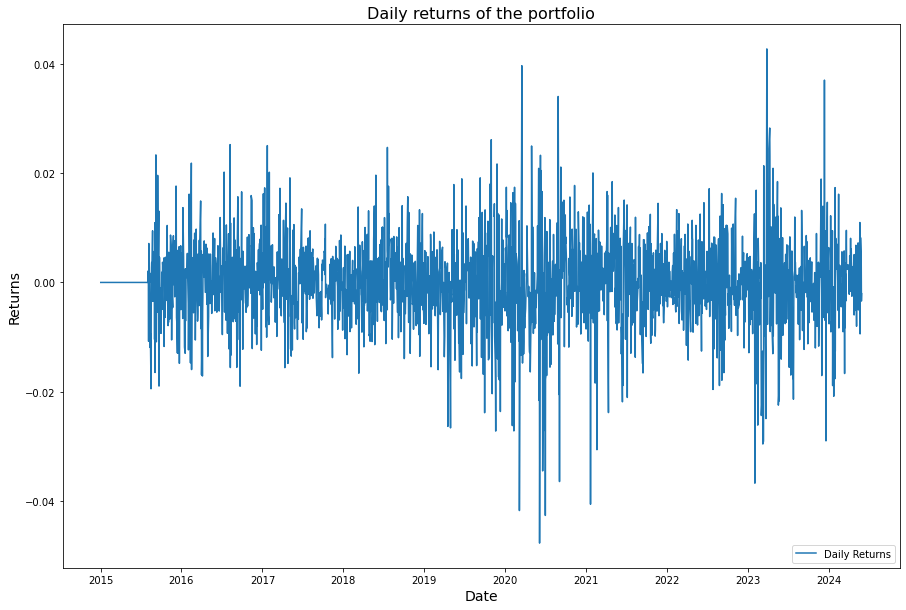

In [197]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(trades_df['Metric'],trades_df['Rolling_returns'],label = 'Daily Returns')
ax.legend(loc='lower right')
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Returns',fontsize=14)
ax.set_title('Daily returns of the portfolio',fontsize=16)

plt.savefig('Daily Returns Distribution.png')
plt.show()

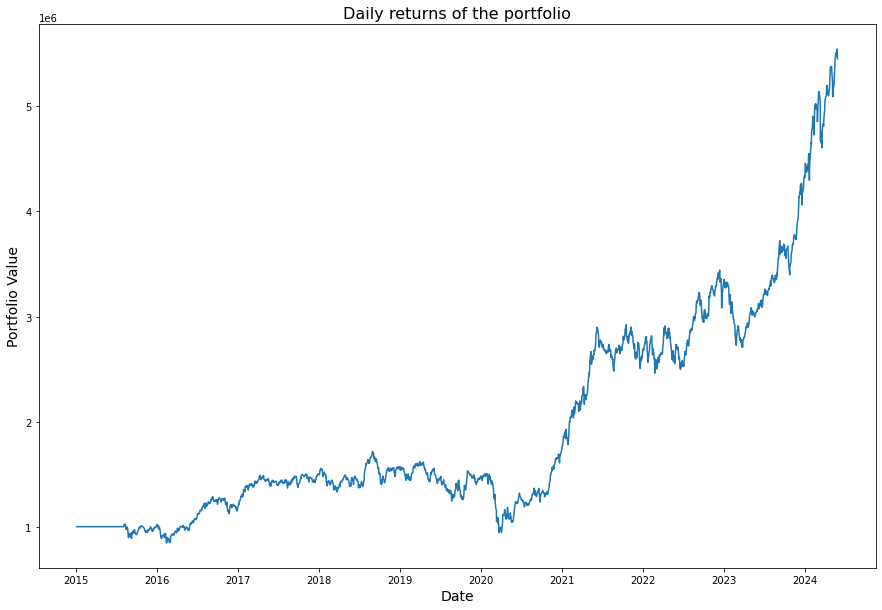

In [208]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(daily_values_df.index,daily_values_df.portfolio_value,label = 'Daily Returns')
# ax.legend(loc='lower right')
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Portfolio Value',fontsize=14)
ax.set_title('Daily returns of the portfolio',fontsize=16)

plt.savefig('Portfolio Value.png')
plt.show()